# [2.X코드반영] Lab 06-1: Softmax classifier 를 TensorFlow 로 구현하기

In [2]:
import tensorflow as tf
import numpy as np

print(tf.__version__)

tf.random.set_seed(777)  # for reproducibility

2.4.1


In [5]:
# 샘플 데이터
x_data = [[1, 2, 1, 1],
          [2, 1, 3, 2],
          [3, 1, 3, 4],
          [4, 1, 5, 5],
          [1, 7, 5, 5],
          [1, 2, 5, 6],
          [1, 6, 6, 6],
          [1, 7, 7, 7]]

# 원핫 인코딩
y_data = [[0, 0, 1],
          [0, 0, 1],
          [0, 0, 1],
          [0, 1, 0],
          [0, 1, 0],
          [0, 1, 0],
          [1, 0, 0],
          [1, 0, 0]]

# 실수 np.array로 변환
x_data = np.asarray(x_data, dtype=np.float32)
y_data = np.asarray(y_data, dtype=np.float32)

# y데이터 클래스 = 3개
nb_classes = 3

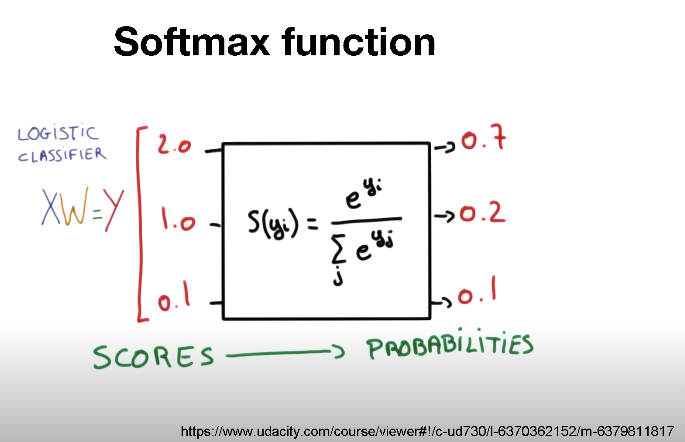

소프트맥스 함수는 여러 개의 클래스를 분류/예측할 때 유용하다.

x과 w를 이용해 score를 구한다.
score를 소프트맥스 함수에 통과시키면 확률값이 출력된다.

In [19]:
# 가중치와 편향 설정
W = tf.Variable(tf.random.normal([4,nb_classes]), name='weight')
b = tf.Variable(tf.random.normal([nb_classes]), name='bias')
variables = [W,b]

print(W, b)

<tf.Variable 'weight:0' shape=(4, 3) dtype=float32, numpy=
array([[ 0.35265976, -0.25515324, -1.1368378 ],
       [-0.7476295 , -0.9641192 , -0.26755205],
       [ 1.2396927 , -1.0720978 , -0.96597004],
       [-1.9027146 , -0.29748687, -0.37349987]], dtype=float32)> <tf.Variable 'bias:0' shape=(3,) dtype=float32, numpy=array([ 1.7266569 ,  0.93108284, -0.43655586], dtype=float32)>


In [7]:
# 소프트맥스 함수 사용
def hypothesis(X):
  return tf.nn.softmax(tf.matmul(X,W)+b)

print(hypothesis(x_data))

tf.Tensor(
[[1.3657196e-02 7.9016238e-03 9.7844124e-01]
 [3.9259776e-02 1.7034741e-02 9.4370544e-01]
 [3.8038525e-01 1.6772316e-01 4.5189157e-01]
 [3.2339048e-01 5.9075940e-02 6.1753362e-01]
 [3.6299741e-06 6.2072729e-08 9.9999630e-01]
 [2.6252020e-02 1.0727962e-02 9.6301997e-01]
 [1.5652511e-05 4.2180278e-07 9.9998391e-01]
 [2.9407690e-06 3.8113328e-08 9.9999702e-01]], shape=(8, 3), dtype=float32)


In [9]:
# 소프트맥스 원핫 테스트
sample_db = [[8,2,1,4]]
sample_db = np.asarray(sample_db, dtype=np.float32)

# 결과
print(hypothesis(sample_db))

tf.Tensor([[0.9302204  0.06200533 0.00777428]], shape=(1, 3), dtype=float32)


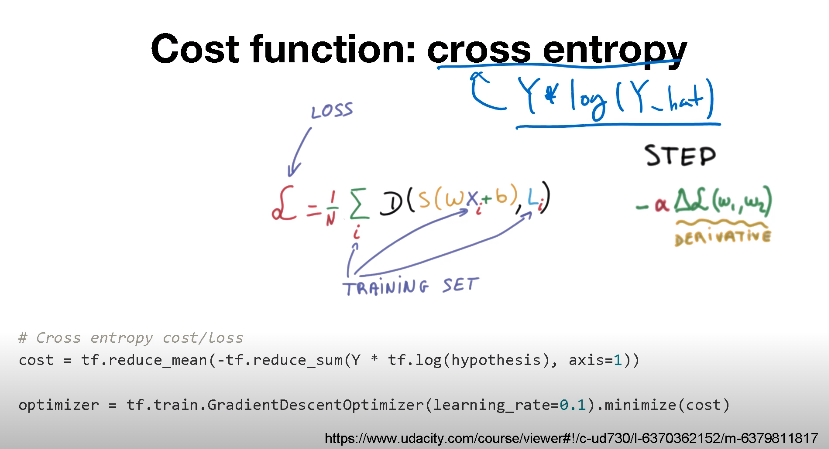

In [15]:
# corss entrophy 손실 함수 정의
def cost_fn(X, Y):
  logits = hypothesis(X)
  # 소프트맥스 함수로 로짓값을 구한 후에 각각의 크로스 엔트로피 값을 구한 후 평균값을 구한다.
  cost = -tf.reduce_sum(Y * tf.math.log(logits), axis=1)
  cost_mean = tf.reduce_mean(cost)
  return cost_mean

print(cost_fn(x_data, y_data))

tf.Tensor(6.07932, shape=(), dtype=float32)


In [17]:
x = tf.constant(3.0)
with tf.GradientTape() as g:
    g.watch(x)
    y = x * x # x^2
dy_dx = g.gradient(y, x) # Will compute to 6.0
print(dy_dx)

tf.Tensor(6.0, shape=(), dtype=float32)


In [20]:
# 미분값 기록
def grad_fn(X,Y):
  with tf.GradientTape() as tape:
    cost = cost_fn(X,Y)
    # variable은 logits 값의 w와 b 의미
    grads = tape.gradient(cost, variables)
    return grads

print(grad_fn(x_data, y_data))

[<tf.Tensor: shape=(4, 3), dtype=float32, numpy=
array([[ 1.4636137 , -0.72419554, -0.73941827],
       [ 1.6759303 , -1.2196605 , -0.45626992],
       [ 2.6729586 , -1.835885  , -0.8370737 ],
       [ 2.789841  , -1.9541732 , -0.83566797]], dtype=float32)>, <tf.Tensor: shape=(3,), dtype=float32, numpy=array([ 0.72310245, -0.35833293, -0.36476952], dtype=float32)>]


In [25]:
# 학습
def fit(X, Y, epochs=2000, verbose=100):
  optimizer = tf.keras.optimizers.SGD(learning_rate=0.1)

  for i in range(epochs):
    grads = grad_fn(X,Y)
    optimizer.apply_gradients(zip(grads, variables))
    if (i==0) | ((i+1)%verbose==0):
      print('Loss at epoch %d: %f' %(i+1, cost_fn(X,Y).numpy()))
  
fit(x_data, y_data)

Loss at epoch 1: 2.291536
Loss at epoch 100: 0.674850
Loss at epoch 200: 0.567991
Loss at epoch 300: 0.502982
Loss at epoch 400: 0.448132
Loss at epoch 500: 0.397248
Loss at epoch 600: 0.348312
Loss at epoch 700: 0.301183
Loss at epoch 800: 0.261136
Loss at epoch 900: 0.242554
Loss at epoch 1000: 0.229803
Loss at epoch 1100: 0.218356
Loss at epoch 1200: 0.208003
Loss at epoch 1300: 0.198586
Loss at epoch 1400: 0.189976
Loss at epoch 1500: 0.182072
Loss at epoch 1600: 0.174787
Loss at epoch 1700: 0.168052
Loss at epoch 1800: 0.161806
Loss at epoch 1900: 0.155997
Loss at epoch 2000: 0.150581


In [26]:
# 예측

# 가장
a = hypothesis(x_data)
print(a)
print(tf.argmax(a,1))
print(tf.argmax(y_data, 1))

tf.Tensor(
[[3.9133215e-06 1.0597151e-03 9.9893636e-01]
 [2.9924994e-03 8.3168320e-02 9.1383922e-01]
 [2.7975803e-08 1.6104336e-01 8.3895659e-01]
 [8.4572935e-07 8.5109627e-01 1.4890297e-01]
 [2.4311101e-01 7.4468702e-01 1.2202020e-02]
 [1.2704736e-01 8.7294102e-01 1.1603403e-05]
 [7.6839936e-01 2.3157801e-01 2.2654867e-05]
 [9.2078197e-01 7.9217702e-02 3.8408101e-07]], shape=(8, 3), dtype=float32)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)
tf.Tensor([2 2 2 1 1 1 0 0], shape=(8,), dtype=int64)


In [27]:
class softmax_classifer(tf.keras.Model):
    def __init__(self, nb_classes):
        super(softmax_classifer, self).__init__()
        self.W = tf.Variable(tf.random.normal((4, nb_classes)), name='weight')
        self.b = tf.Variable(tf.random.normal((nb_classes,)), name='bias')
        
    def softmax_regression(self, X):
        return tf.nn.softmax(tf.matmul(X, self.W) + self.b)
    
    def cost_fn(self, X, Y):
        logits = self.softmax_regression(X)
        cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.math.log(logits), axis=1))        
        return cost
    
    def grad_fn(self, X, Y):
        with tf.GradientTape() as tape:
            cost = self.cost_fn(x_data, y_data)
            grads = tape.gradient(cost, self.variables)            
            return grads
    
    def fit(self, X, Y, epochs=2000, verbose=500):
        optimizer =  tf.keras.optimizers.SGD(learning_rate=0.1)

        for i in range(epochs):
            grads = self.grad_fn(X, Y)
            optimizer.apply_gradients(zip(grads, self.variables))
            if (i==0) | ((i+1)%verbose==0):
                print('Loss at epoch %d: %f' %(i+1, self.cost_fn(X, Y).numpy()))
            
model = softmax_classifer(nb_classes)
model.fit(x_data, y_data)

Loss at epoch 1: 9.457277
Loss at epoch 500: 0.505920
Loss at epoch 1000: 0.277469
Loss at epoch 1500: 0.204628
Loss at epoch 2000: 0.167065
